In [5]:
import pandas as pd 
df=pd.read_csv('etiketlicevrehaber.csv')
df

,Unnamed: 0,source,content,date,cleaned_text,pseudo_label
0,0,sozcu,Bilim insanları 17nci yüzyıldan kaldığına ina...,11-3-2023,bilim insanları 17nci yüzyıldan kaldığına ina...,1
1,1,sozcu,Meteorolojinin tahminlerine göre bugün yurdun...,11-3-2023,meteorolojinin tahminlerine göre bugün yurdun...,1
2,2,sozcu,"Akdeniz açıklarında 4,1 büyüklüğünde deprem me...",11-3-2023,akdeniz açıklarında 4 1 büyüklüğünde deprem me...,1
3,3,sozcu,"Meteoroloji Genel Müdürlüğü ( MGM, güncel hava...",11-3-2023,meteoroloji genel müdürlüğü mgm güncel hava...,1
4,4,gazetoksijen,Türkiyede çocukların yüzde 71i karbon ayak izi...,11-3-2023,türkiyede çocukların yüzde 71i karbon ayak izi...,1
...,...,...,...,...,...,...
497,497,haberturk,Türkiye’nin kuzeyinde hava sabah ve gece serin...,05-27-2024,türkiye nin kuzeyinde hava sabah ve gece serin...,1
498,498,haberturk,Arhavi ilçe girişi 3. kilometresinde bugün sab...,05-27-2024,arhavi ilçe girişi 3 kilometresinde bugün sab...,1
499,499,haberturk,Meteoroloji Genel Müdürlüğü tarafından yapılan...,05-27-2024,meteoroloji genel müdürlüğü tarafından yapılan...,1
500,500,haberturk,Türkiye'nin dört bir yanında artçı ve bağımsız...,05-27-2024,türkiye nin dört bir yanında artçı ve bağımsız...,1


In [2]:
df['Content'] = df['Content'].astype(str).str.lower()
df['Content']

0       antalya - sağlık ve sigorta yöneticileri dern...
1      meteoroloji genel müdürlüğü ( mgm, güncel hava...
2       fentanil, uyuşturucu krizinin üçüncü dalgası ...
3      plastikleri hayatımızdan çıkarmanın önemi ile ...
4      devir hızla değişiyor, etrafımızdaki her şey ç...
                             ...                        
578    türkiye bu haftasonu güneşlendi, marmara ve eg...
579    türk devletleri teşkilatı (tdt) sosyal politik...
580    rize valiliği, doğu karadeniz'de tatilcilerin ...
581    türkiye’nin kuzeyinde hava sabah ve gece serin...
582    i̇bb meclisi mayıs ayı dördüncü toplantısı, me...
Name: Content, Length: 583, dtype: object

In [3]:
import re
def kesme_isaretlerini_kaldir(metin):
    return re.sub(r"[’'\r\n@’’/0123456789()``\-:,]", "", metin)
df['Content'] = df['Content'].apply(kesme_isaretlerini_kaldir)
df

,Unnamed: 0.1,Unnamed: 0,Content,Keywords,Source,date
0,3,3,antalya sağlık ve sigorta yöneticileri derne...,"['afet', 'deprem', 'ekosistem']",gazeteduvar,11-3-2023
1,4,4,meteoroloji genel müdürlüğü mgm güncel hava d...,"['hava', 'rüzgar', 'dolu']",sozcu,11-3-2023
2,8,8,fentanil uyuşturucu krizinin üçüncü dalgası o...,"['hayvan', 'sentetik', 'yıkım']",eksiseyler.com,11-3-2023
3,9,9,plastikleri hayatımızdan çıkarmanın önemi ile ...,"['arıtma', 'filtre', 'plastik']",uplifers,11-3-2023
4,10,10,devir hızla değişiyor etrafımızdaki her şey ça...,"['enerji', 'mevsim', 'çevre']",uplifers,11-3-2023
...,...,...,...,...,...,...
578,646,646,türkiye bu haftasonu güneşlendi marmara ve ege...,"['hava', 'sıcaklık', 'rüzgar']",haberturk,05-27-2024
579,647,647,türk devletleri teşkilatı tdt sosyal politika ...,"['deprem', 'denge', 'çevresel']",haberturk,05-27-2024
580,648,648,rize valiliği doğu karadenizde tatilcilerin sı...,"['madde', 'çevresel', 'madde']",haberturk,05-27-2024
581,649,649,türkiyenin kuzeyinde hava sabah ve gece serin ...,"['hava', 'sıcaklık', 'mevsim']",haberturk,05-27-2024


In [2]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("emre/turkish-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("emre/turkish-sentiment-analysis")

# Define a function to perform sentiment analysis
def analyze_sentiment(article_descriptions):
     sentiment_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer)
     sentiments = sentiment_pipeline(article_descriptions)
     return sentiments

article_descriptions = df["cleaned_text"].tolist()
sentiments = analyze_sentiment(article_descriptions)
sentiment_labels = [sentiment["label"] for sentiment in sentiments]
sentiment_scores = [sentiment["score"] for sentiment in sentiments]

# Add sentiment labels and scores to the df
df["sentiment_label"] = sentiment_labels
df["sentiment_score"] = sentiment_scores
df

Token indices sequence length is longer than the specified maximum sequence length for this model (762 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (762) must match the size of tensor b (512) at non-singleton dimension 1

In [3]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Define a function to perform sentiment analysis
def analyze_sentiment(article_descriptions):
    sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    sentiments = []
    batch_size = 8  # Adjust batch size as needed
    for i in range(0, len(article_descriptions), batch_size):
        batch = article_descriptions[i:i+batch_size]
        batch_sentiments = sentiment_pipeline(batch, truncation=True)
        sentiments.extend(batch_sentiments)
    return sentiments

# Assuming df is your DataFrame containing article descriptions
article_descriptions = df["cleaned_text"].tolist()
sentiments = analyze_sentiment(article_descriptions)
sentiment_labels = [sentiment["label"] for sentiment in sentiments]
sentiment_scores = [sentiment["score"] for sentiment in sentiments]

# Add sentiment labels and scores to the df
df["sentiment_label"] = sentiment_labels
df["sentiment_score"] = sentiment_scores
df

,Unnamed: 0,source,content,date,cleaned_text,pseudo_label,sentiment_label,sentiment_score
0,0,sozcu,Bilim insanları 17nci yüzyıldan kaldığına ina...,11-3-2023,bilim insanları 17nci yüzyıldan kaldığına ina...,1,1 star,0.240981
1,1,sozcu,Meteorolojinin tahminlerine göre bugün yurdun...,11-3-2023,meteorolojinin tahminlerine göre bugün yurdun...,1,3 stars,0.303661
2,2,sozcu,"Akdeniz açıklarında 4,1 büyüklüğünde deprem me...",11-3-2023,akdeniz açıklarında 4 1 büyüklüğünde deprem me...,1,1 star,0.678491
3,3,sozcu,"Meteoroloji Genel Müdürlüğü ( MGM, güncel hava...",11-3-2023,meteoroloji genel müdürlüğü mgm güncel hava...,1,1 star,0.385167
4,4,gazetoksijen,Türkiyede çocukların yüzde 71i karbon ayak izi...,11-3-2023,türkiyede çocukların yüzde 71i karbon ayak izi...,1,1 star,0.462148
...,...,...,...,...,...,...,...,...
497,497,haberturk,Türkiye’nin kuzeyinde hava sabah ve gece serin...,05-27-2024,türkiye nin kuzeyinde hava sabah ve gece serin...,1,1 star,0.483609
498,498,haberturk,Arhavi ilçe girişi 3. kilometresinde bugün sab...,05-27-2024,arhavi ilçe girişi 3 kilometresinde bugün sab...,1,1 star,0.686634
499,499,haberturk,Meteoroloji Genel Müdürlüğü tarafından yapılan...,05-27-2024,meteoroloji genel müdürlüğü tarafından yapılan...,1,1 star,0.359729
500,500,haberturk,Türkiye'nin dört bir yanında artçı ve bağımsız...,05-27-2024,türkiye nin dört bir yanında artçı ve bağımsız...,1,1 star,0.635863


In [10]:
tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

def analyze_sentiment(article_descriptions):
     sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
     sentiments = sentiment_pipeline(article_descriptions)
     return sentiments

article_descriptions = df["cleaned_text"].tolist()
sentiments = analyze_sentiment(article_descriptions)
sentiment_labels = [sentiment["label"] for sentiment in sentiments]
sentiment_scores = [sentiment["score"] for sentiment in sentiments]

df["sentiment_label"] = sentiment_labels
df["sentiment_score"] = sentiment_scores
df


Token indices sequence length is longer than the specified maximum sequence length for this model (3280 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The expanded size of the tensor (3280) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 3280].  Tensor sizes: [1, 514]

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,source,content,date,cleaned_text,pseudo_label
0,sozcu,Bilim insanları 17nci yüzyıldan kaldığına ina...,11-3-2023,bilim insanları 17nci yüzyıldan kaldığına ina...,1
1,sozcu,Meteorolojinin tahminlerine göre bugün yurdun...,11-3-2023,meteorolojinin tahminlerine göre bugün yurdun...,1
2,sozcu,"Akdeniz açıklarında 4,1 büyüklüğünde deprem me...",11-3-2023,akdeniz açıklarında 4 1 büyüklüğünde deprem me...,1
3,sozcu,"Meteoroloji Genel Müdürlüğü ( MGM, güncel hava...",11-3-2023,meteoroloji genel müdürlüğü mgm güncel hava...,1
4,gazetoksijen,Türkiyede çocukların yüzde 71i karbon ayak izi...,11-3-2023,türkiyede çocukların yüzde 71i karbon ayak izi...,1
...,...,...,...,...,...
497,haberturk,Türkiye’nin kuzeyinde hava sabah ve gece serin...,05-27-2024,türkiye nin kuzeyinde hava sabah ve gece serin...,1
498,haberturk,Arhavi ilçe girişi 3. kilometresinde bugün sab...,05-27-2024,arhavi ilçe girişi 3 kilometresinde bugün sab...,1
499,haberturk,Meteoroloji Genel Müdürlüğü tarafından yapılan...,05-27-2024,meteoroloji genel müdürlüğü tarafından yapılan...,1
500,haberturk,Türkiye'nin dört bir yanında artçı ve bağımsız...,05-27-2024,türkiye nin dört bir yanında artçı ve bağımsız...,1


In [4]:
df.to_csv('sentiment_data.csv')
df

,Unnamed: 0,source,content,date,cleaned_text,pseudo_label,sentiment_label,sentiment_score
0,0,sozcu,Bilim insanları 17nci yüzyıldan kaldığına ina...,11-3-2023,bilim insanları 17nci yüzyıldan kaldığına ina...,1,1 star,0.240981
1,1,sozcu,Meteorolojinin tahminlerine göre bugün yurdun...,11-3-2023,meteorolojinin tahminlerine göre bugün yurdun...,1,3 stars,0.303661
2,2,sozcu,"Akdeniz açıklarında 4,1 büyüklüğünde deprem me...",11-3-2023,akdeniz açıklarında 4 1 büyüklüğünde deprem me...,1,1 star,0.678491
3,3,sozcu,"Meteoroloji Genel Müdürlüğü ( MGM, güncel hava...",11-3-2023,meteoroloji genel müdürlüğü mgm güncel hava...,1,1 star,0.385167
4,4,gazetoksijen,Türkiyede çocukların yüzde 71i karbon ayak izi...,11-3-2023,türkiyede çocukların yüzde 71i karbon ayak izi...,1,1 star,0.462148
...,...,...,...,...,...,...,...,...
497,497,haberturk,Türkiye’nin kuzeyinde hava sabah ve gece serin...,05-27-2024,türkiye nin kuzeyinde hava sabah ve gece serin...,1,1 star,0.483609
498,498,haberturk,Arhavi ilçe girişi 3. kilometresinde bugün sab...,05-27-2024,arhavi ilçe girişi 3 kilometresinde bugün sab...,1,1 star,0.686634
499,499,haberturk,Meteoroloji Genel Müdürlüğü tarafından yapılan...,05-27-2024,meteoroloji genel müdürlüğü tarafından yapılan...,1,1 star,0.359729
500,500,haberturk,Türkiye'nin dört bir yanında artçı ve bağımsız...,05-27-2024,türkiye nin dört bir yanında artçı ve bağımsız...,1,1 star,0.635863


In [11]:
# Belirli değerleri değiştirme
df['date'] = df['date'].replace({
    '2022-2023Q2': '2023-10-10',
    '2017': '2023-09-01',
    '11-3-2023':'2023-11-03',
    '11-15-2023':'2023-11-15',
    '11-22-2023':'2023-11-22',
    '12-08-2023':'2023-12-08',
    '12-03-2023':'2023-12-03',
    '12-16-2023':'2023-12-16',
    '01-09-2023':'2023-09-01',
    '12-13-2023':'2023-12-13',
    '12-19-2023':'2023-12-19',
    '12-27-2023':'2023-12-27',
    '12-24-2023':'2023-12-24',
    '05-13-2024':'2024-05-13',
    '05-20-2024':'2024-05-20',
    '05-27-2024':'2024-05-27',
    
})


df

,source,content,date,cleaned_text,pseudo_label
0,sozcu,Bilim insanları 17nci yüzyıldan kaldığına ina...,2023-11-03,bilim insanları 17nci yüzyıldan kaldığına ina...,1
1,sozcu,Meteorolojinin tahminlerine göre bugün yurdun...,2023-11-03,meteorolojinin tahminlerine göre bugün yurdun...,1
2,sozcu,"Akdeniz açıklarında 4,1 büyüklüğünde deprem me...",2023-11-03,akdeniz açıklarında 4 1 büyüklüğünde deprem me...,1
3,sozcu,"Meteoroloji Genel Müdürlüğü ( MGM, güncel hava...",2023-11-03,meteoroloji genel müdürlüğü mgm güncel hava...,1
4,gazetoksijen,Türkiyede çocukların yüzde 71i karbon ayak izi...,2023-11-03,türkiyede çocukların yüzde 71i karbon ayak izi...,1
...,...,...,...,...,...
497,haberturk,Türkiye’nin kuzeyinde hava sabah ve gece serin...,2024-05-27,türkiye nin kuzeyinde hava sabah ve gece serin...,1
498,haberturk,Arhavi ilçe girişi 3. kilometresinde bugün sab...,2024-05-27,arhavi ilçe girişi 3 kilometresinde bugün sab...,1
499,haberturk,Meteoroloji Genel Müdürlüğü tarafından yapılan...,2024-05-27,meteoroloji genel müdürlüğü tarafından yapılan...,1
500,haberturk,Türkiye'nin dört bir yanında artçı ve bağımsız...,2024-05-27,türkiye nin dört bir yanında artçı ve bağımsız...,1


In [12]:
# Değiştirilen tarihleri datetime formatına çevirme
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,source,content,date,cleaned_text,pseudo_label
0,sozcu,Bilim insanları 17nci yüzyıldan kaldığına ina...,2023-11-03,bilim insanları 17nci yüzyıldan kaldığına ina...,1
1,sozcu,Meteorolojinin tahminlerine göre bugün yurdun...,2023-11-03,meteorolojinin tahminlerine göre bugün yurdun...,1
2,sozcu,"Akdeniz açıklarında 4,1 büyüklüğünde deprem me...",2023-11-03,akdeniz açıklarında 4 1 büyüklüğünde deprem me...,1
3,sozcu,"Meteoroloji Genel Müdürlüğü ( MGM, güncel hava...",2023-11-03,meteoroloji genel müdürlüğü mgm güncel hava...,1
4,gazetoksijen,Türkiyede çocukların yüzde 71i karbon ayak izi...,2023-11-03,türkiyede çocukların yüzde 71i karbon ayak izi...,1
...,...,...,...,...,...
497,haberturk,Türkiye’nin kuzeyinde hava sabah ve gece serin...,2024-05-27,türkiye nin kuzeyinde hava sabah ve gece serin...,1
498,haberturk,Arhavi ilçe girişi 3. kilometresinde bugün sab...,2024-05-27,arhavi ilçe girişi 3 kilometresinde bugün sab...,1
499,haberturk,Meteoroloji Genel Müdürlüğü tarafından yapılan...,2024-05-27,meteoroloji genel müdürlüğü tarafından yapılan...,1
500,haberturk,Türkiye'nin dört bir yanında artçı ve bağımsız...,2024-05-27,türkiye nin dört bir yanında artçı ve bağımsız...,1


In [13]:
df.to_csv('etiketlicevrehaber.csv')
df

,source,content,date,cleaned_text,pseudo_label
0,sozcu,Bilim insanları 17nci yüzyıldan kaldığına ina...,2023-11-03,bilim insanları 17nci yüzyıldan kaldığına ina...,1
1,sozcu,Meteorolojinin tahminlerine göre bugün yurdun...,2023-11-03,meteorolojinin tahminlerine göre bugün yurdun...,1
2,sozcu,"Akdeniz açıklarında 4,1 büyüklüğünde deprem me...",2023-11-03,akdeniz açıklarında 4 1 büyüklüğünde deprem me...,1
3,sozcu,"Meteoroloji Genel Müdürlüğü ( MGM, güncel hava...",2023-11-03,meteoroloji genel müdürlüğü mgm güncel hava...,1
4,gazetoksijen,Türkiyede çocukların yüzde 71i karbon ayak izi...,2023-11-03,türkiyede çocukların yüzde 71i karbon ayak izi...,1
...,...,...,...,...,...
497,haberturk,Türkiye’nin kuzeyinde hava sabah ve gece serin...,2024-05-27,türkiye nin kuzeyinde hava sabah ve gece serin...,1
498,haberturk,Arhavi ilçe girişi 3. kilometresinde bugün sab...,2024-05-27,arhavi ilçe girişi 3 kilometresinde bugün sab...,1
499,haberturk,Meteoroloji Genel Müdürlüğü tarafından yapılan...,2024-05-27,meteoroloji genel müdürlüğü tarafından yapılan...,1
500,haberturk,Türkiye'nin dört bir yanında artçı ve bağımsız...,2024-05-27,türkiye nin dört bir yanında artçı ve bağımsız...,1


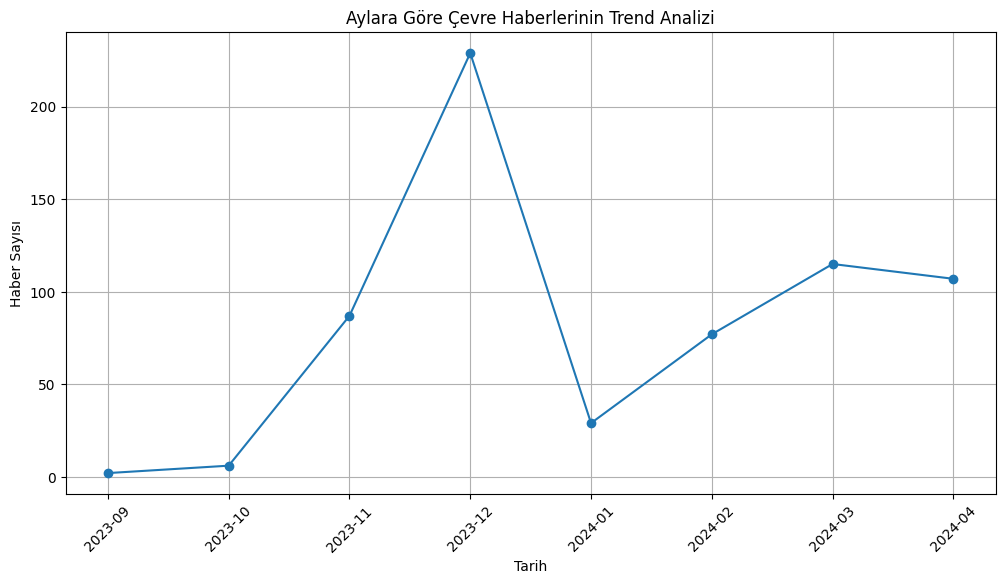

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Aylık haber sayısını hesaplama
df['month'] = df['date'].dt.to_period('M')
monthly_counts = df['month'].value_counts().sort_index()

# Trend grafiği oluşturma
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o', linestyle='-')
plt.title('Aylara Göre Çevre Haberlerinin Trend Analizi')
plt.xlabel('Tarih')
plt.ylabel('Haber Sayısı')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

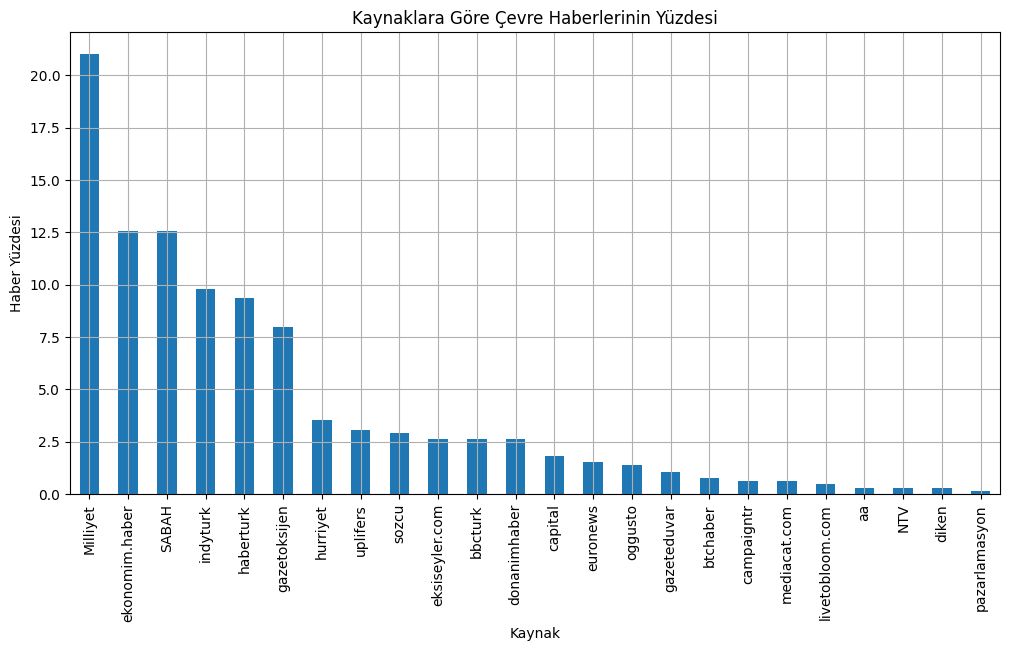

In [54]:
# Kaynaklara göre haber sayısını hesaplama
source_counts = df['Source'].value_counts()

# Yüzdelik hesaplama
source_percentages = (source_counts / source_counts.sum()) * 100

# Grafik oluşturma
plt.figure(figsize=(12, 6))
source_percentages.plot(kind='bar')
plt.title('Kaynaklara Göre Çevre Haberlerinin Yüzdesi')
plt.xlabel('Kaynak')
plt.ylabel('Haber Yüzdesi')
plt.grid(True)
plt.show()

In [34]:
df=pd.read_csv('cevrehaberlerilemmatize(1).csv')
df

,Unnamed: 0.1,Unnamed: 0,source,content,date,cleaned_text,pseudo_label,coontent_lemmatize,content-token
0,36,36,sozcu,bilim insanları 17nci yüzyıldan kaldığına ina...,11-3-2023,bilim insanları 17nci yüzyıldan kaldığına ina...,1,bilim insan 17nci yüzyıl kalmak inanmak bir İn...,"['bilim', 'insan', '17nci', 'yüzyıl', 'kalmak'..."
1,37,37,sozcu,meteorolojinin tahminlerine göre bugün yurdun...,11-3-2023,meteorolojinin tahminlerine göre bugün yurdun...,1,meteoroloji tahmin göre bugün yurdu Büyük kısı...,"['meteoroloji', 'tahmin', 'göre', 'bugün', 'yu..."
2,67,67,sozcu,"akdeniz açıklarında 4,1 büyüklüğünde deprem me...",11-3-2023,akdeniz açıklarında 4 1 büyüklüğünde deprem me...,1,Akdeniz açık 4 1 Büyük deprem meydan gelmek af...,"['Akdeniz', 'açık', '4', '1', 'Büyük', 'deprem..."
3,75,75,sozcu,"meteoroloji genel müdürlüğü ( mgm, güncel hava...",11-3-2023,meteoroloji genel müdürlüğü mgm güncel hava...,1,meteoroloji genel müdür mgm güncel hava durum ...,"['meteoroloji', 'genel', 'müdür', 'mgm', 'günc..."
4,271,271,gazetoksijen,türkiyede çocukların yüzde 71i karbon ayak izi...,11-3-2023,türkiyede çocukların yüzde 71i karbon ayak izi...,1,Türkiye çocuk yüzde 71i karbon ayak iz Hakk bi...,"['Türkiye', 'çocuk', 'yüzde', '71i', 'karbon',..."
...,...,...,...,...,...,...,...,...,...
497,12456,12456,haberturk,türkiye’nin kuzeyinde hava sabah ve gece serin...,05-27-2024,türkiye nin kuzeyinde hava sabah ve gece serin...,1,Türkiye nin kuzey hava Sabah ve Ge serin Günba...,"['Türkiye', 'nin', 'kuzey', 'hava', 'Sabah', '..."
498,12490,12490,haberturk,arhavi ilçe girişi 3. kilometresinde bugün sab...,05-27-2024,arhavi ilçe girişi 3 kilometresinde bugün sab...,1,Arhavi ilçe giriş 3 kilometre bugün Sabah saat...,"['Arhavi', 'ilçe', 'giriş', '3', 'kilometre', ..."
499,12505,12505,haberturk,meteoroloji genel müdürlüğü tarafından yapılan...,05-27-2024,meteoroloji genel müdürlüğü tarafından yapılan...,1,meteoroloji genel müdür tarafından yapılanmak ...,"['meteoroloji', 'genel', 'müdür', 'tarafından'..."
500,12507,12507,haberturk,türkiye'nin dört bir yanında artçı ve bağımsız...,05-27-2024,türkiye nin dört bir yanında artçı ve bağımsız...,1,Türkiye nin dört bir yan art ve bağımsız depre...,"['Türkiye', 'nin', 'dört', 'bir', 'yan', 'art'..."


     Unnamed: 0.1  Unnamed: 0        source  \
0              36          36         sozcu   
1              37          37         sozcu   
2              67          67         sozcu   
3              75          75         sozcu   
4             271         271  gazetoksijen   
..            ...         ...           ...   
497         12456       12456     haberturk   
498         12490       12490     haberturk   
499         12505       12505     haberturk   
500         12507       12507     haberturk   
501         12530       12530     haberturk   

                                               content        date  \
0     bilim insanları 17nci yüzyıldan kaldığına ina...   11-3-2023   
1     meteorolojinin tahminlerine göre bugün yurdun...   11-3-2023   
2    akdeniz açıklarında 4,1 büyüklüğünde deprem me...   11-3-2023   
3    meteoroloji genel müdürlüğü ( mgm, güncel hava...   11-3-2023   
4    türkiyede çocukların yüzde 71i karbon ayak izi...   11-3-2023   
..             

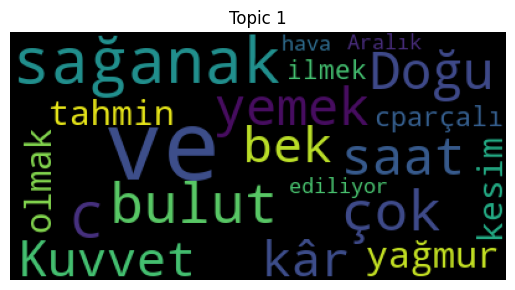

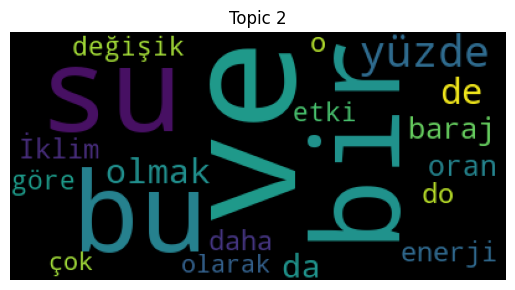

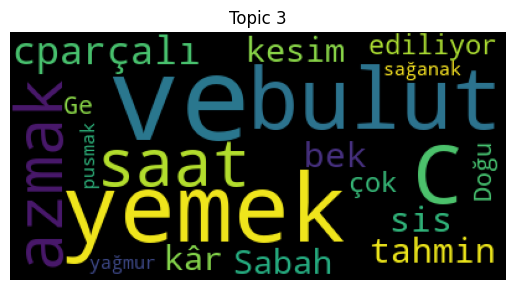

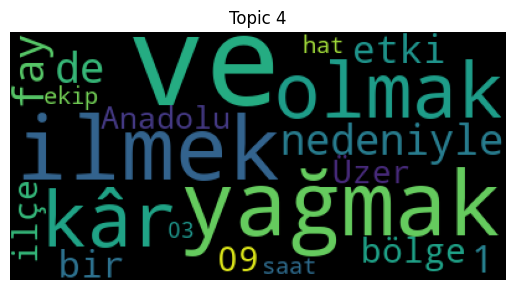

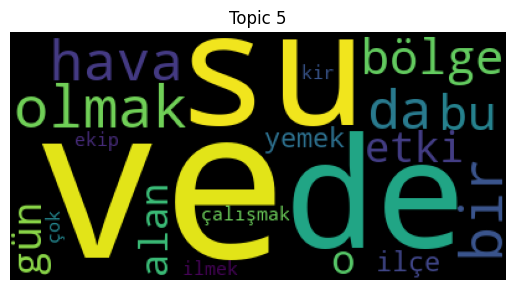

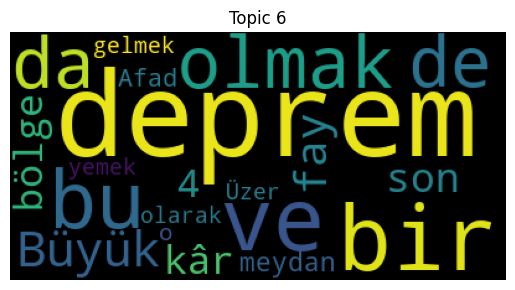

IndexError: index 6 is out of bounds for axis 0 with size 6

<Figure size 640x480 with 0 Axes>

In [35]:
import pandas as pd
import gensim
import nltk
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords = nltk.corpus.stopwords.words("turkish")
stopwords1 = ['bir', 'nin', 'olan', 'göre','aa','reuters','ranker','başka','anlamak','beledi','rus','hakk','edi','mark',
              'bin', 'kadar', 'olduğu', 'nın','hiçbir','böyle','genel','oluşmak','bulunan','özel','the','ayrıca','orta',
              'tarafından', 'devam','title','sabah','mart','nisan','ocak','haf','an','edildi','...','il','hedef','yer','verdi','aldı',
              'önce','olduğunu','ilk','aynı','dış haberler servisi','bura','genel','et','‘','say','bek','eş','eskimek','iş',
              'olarak', 'fazla','son','milyon','var','gerçek','deva','yüzmek','olacak','ad','  ','e','yemek','gitmek','yaş','sürme',
              'yıl','yeni', 'ancak','açıklamada','geçen','euronews','kişi','ilgili','al','iç','ar','azmak','yang','güve','süre','kap',
              'iki','çeviritype', 'deki','den','etti','oldu','diğer','zaman','olay','yay','bat','ora','içmek','çıkmak','bilemek','bilmek',
              'değil','kendi','sonra','gelen',',','iyi', 'haber merkezi','şekilde','ardından','ediliyor','geçeceği','kararmak',
              'arasında','eden', 'yönelik', 'üzere', 'newseo','ilişkin','görsel','pay','altı','ge','açıklamak','etkimek','gelişmek',
              'e-posta','gün','yazdır','bağlantıyı','yüksek','kopyala','büyük','yapılan','sahip','olmak','ev','göstermek',
              'üzerinde', 'sadece','karşı', 'içinde', 'farklı', 'tek','dan', 'ındependentturkish','facebook','alan','twitter',
                'yılın', 'nun', 'oranı','hakkında','yılında','eylül', 'bunun','uzun','bugün','pıc','linkedln','kullanmak','ulaşmak',
              'yüz', 'com ', '“', '”', 'etmek', 'yılmak', 'yapmak' ,'ilmek', 'demek', 'almak', 'ara', 'bun','se','yaramak','işlem',
              'yermek' ,'kadar','belirmek','https','gelmek','varmak','açıklama','vermek','çalışmak','konu','üzeri','ifade',
              'ben', 'tam boyutta gör', 'art', 'haber', 'azalmak', 'yan', 'açık', 'karmak', 'döne', 'par','söylemek','önem','yük','ilgi'
              ,'saat','kul','başlamak','kalmak','etki','www','html','url','reklam','ilgi','yok','sıra','şekil','yok','ayn','yol','baş','bulunmak','görmek',
              'hafta','yaşamak','yapılanmak','hayat','ön','is','istemek','İlgi','by','devamı','artmak','azalmak','gitmek','sade'
             ]
stopwords = stopwords+stopwords1

import spacy
import string
# Türkçe dil modelini yükleme
nlp = spacy.blank("tr")
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text not in string.punctuation]
    return tokens
    
df['content-token'] = df['coontent_lemmatize'].apply(tokenize_text)# LDA için sözlük ve belge terim matrisi oluşturma
    
df['content_token'] = df['content-token'].apply(lambda x:[item for item in x if item not in stopwords])
print(df)



(9, '0.019*"03" + 0.016*"09" + 0.014*"kâr" + 0.014*"2024" + 0.013*"deprem" + 0.012*"1" + 0.012*"5" + 0.011*"3" + 0.011*"38" + 0.010*"7" + 0.010*"2" + 0.009*"Ml" + 0.008*"hava" + 0.008*"0" + 0.007*"37" + 0.007*"4" + 0.007*"6" + 0.006*"i̇lksel2024" + 0.005*"Büyük" + 0.005*"8"')
(24, '0.031*"yüzde" + 0.018*"do" + 0.017*"yağmak" + 0.016*"baraj" + 0.010*"oran" + 0.010*"Kuvvet" + 0.010*"rüzgâr" + 0.008*"hava" + 0.007*"elektrik" + 0.007*"bölge" + 0.007*"su" + 0.006*"batı" + 0.005*"nedeniyle" + 0.005*"uçmak" + 0.005*"zarar" + 0.005*"2" + 0.005*"bisiklet" + 0.005*"pazartesi" + 0.005*"11" + 0.004*"yaklaşık"')
(17, '0.036*"kâr" + 0.025*"yağmak" + 0.017*"sağanak" + 0.012*"nedeniyle" + 0.009*"Uludağ" + 0.009*"yağmur" + 0.009*"kesim" + 0.007*"Deva" + 0.007*"kent" + 0.007*"Aralık" + 0.007*"bölge" + 0.007*"hava" + 0.007*"su" + 0.006*"trafik" + 0.006*"araç" + 0.006*"ekip" + 0.006*"ilçe" + 0.006*"akşam" + 0.006*"köy" + 0.006*"Kuvvet"')
(1, '0.047*"hava" + 0.015*"i̇stanbul" + 0.012*"derece" + 0.011*"bölg

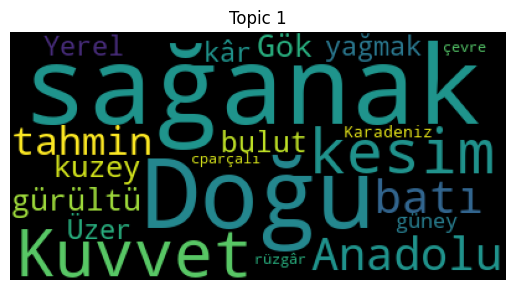

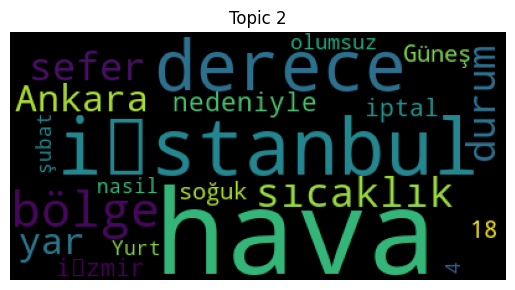

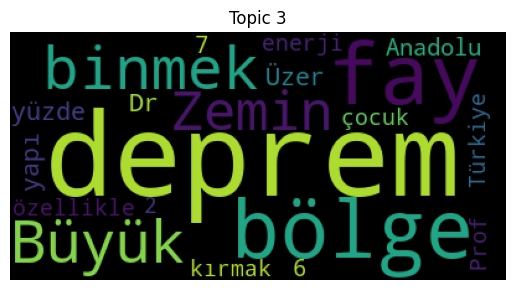

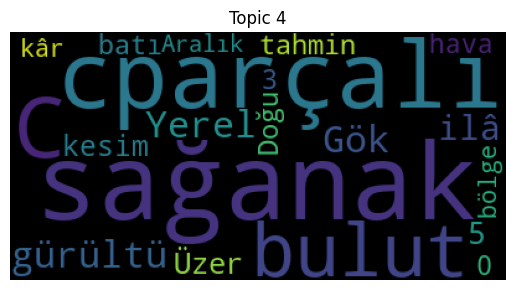

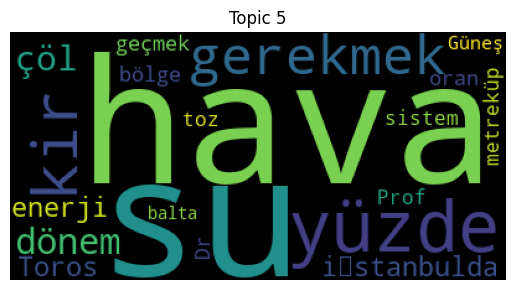

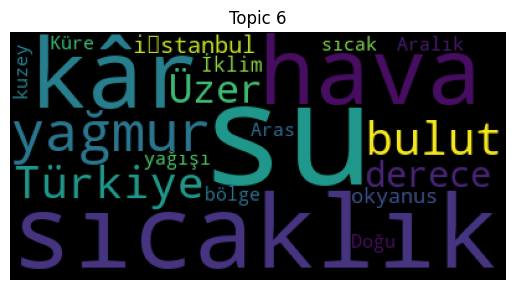

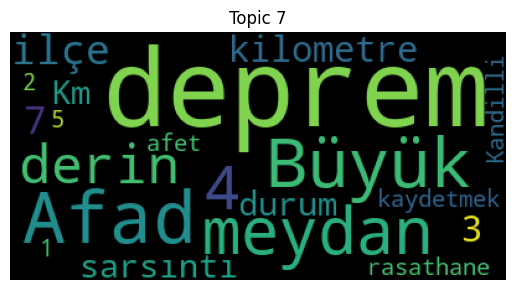

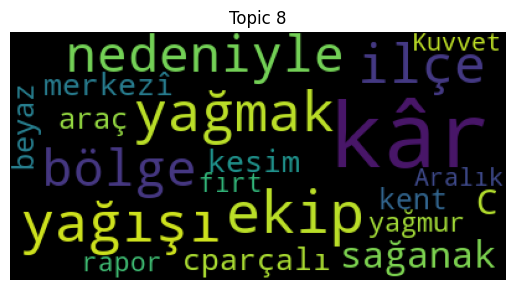

In [38]:
dictionary = corpora.Dictionary(df['content_token'])
dictionary.filter_extremes(no_below=1, no_above=0.8)
corpus = [dictionary.doc2bow(text) for text in df['content_token']]

# LDA modelini eğitme
lda_model = gensim.models.LdaModel(corpus, num_topics=25, id2word=dictionary, passes=5, iterations=100)

# Konuları görüntüleme
topics = lda_model.print_topics(num_words=20)
for topic in topics:
    print(topic)

# Konuları WordCloud ile görselleştirme
for i in range(8):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(i, 20))))
    plt.title(f'Topic {i+1}')
    plt.axis('off')
    plt.show()


In [11]:
import spacy
import string
# Türkçe dil modelini yükleme
nlp = spacy.blank("tr")
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text not in string.punctuation]
    return tokens

df['content-token'] = df['Content'].apply(tokenize_text)
df

,Unnamed: 0,Content,Keywords,Source,content-token
0,0,duvar artmak kira fiyat metropol yaşamak hâl...,"['çevre', 'doğa', 'tarım', 'hayvan']",gazeteduvar,"[duvar, , artmak, kira, fiyat, , metropol, y..."
1,1,türki cumhuriyet merkez banka tcmb başkan haf...,"['gaz', 'enerji', 'denge', 'petrol']",indyturk,"[türki, cumhuriyet, merkez, banka, , tcmb, ba..."
2,2,cumhurbaşkanı erdoğan atamak boğaziçi üniversi...,"['madde', 'deprem', 'çevre', 'madde']",diken,"[cumhurbaşkanı, erdoğan, atamak, boğaziçi, üni..."
3,3,osman i̇mparatorluğu devralmak i̇slami anlayı...,"['gaz', 'enerji', 'hava', 'petrol']",indyturk,"[osman, i̇mparatorluğu, , devralmak, i̇slami,..."
4,4,antalya sağ ve sigorta yönetmek dernek sasde...,"['afet', 'madde', 'deprem', 'çevre']",gazeteduvar,"[antalya, , sağ, ve, sigorta, yönetmek, derne..."
...,...,...,...,...,...
948,948,enerji ve tabii kaynaklar bakanı alparslan bay...,"['karbon', 'gaz', 'enerji', 'emisyon']",ekonomim.haber,"[enerji, ve, tabii, kaynaklar, bakanı, alparsl..."
949,949,seyi̇r defteri̇ aysel yücelkamion vestel peps...,"['karbon', 'çevre', 'karbon', 'çevre']",ekonomim.haber,"[seyi̇r, defteri̇, , aysel, yücelkamion, vest..."
950,950,gazete oksijenin bloombergden derlediği habere...,"['gaz', 'enerji', 'fosil', 'petrol']",ekonomim.haber,"[gazete, oksijenin, bloombergden, derlediği, h..."
951,951,türkiyenin ilk ağır sanayi yatırımı kardemir b...,"['enerji', 'arıtma', 'çevre', 'çevre']",ekonomim.haber,"[türkiyenin, ilk, ağır, sanayi, yatırımı, kard..."


C:\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['boyutta', 'com', 'dış', 'gör', 'haberler', 'lgi', 'merkezi', 'posta', 'servisi', 'tam'] not in stop_words.
  warnings.warn(



Cluster 0:
1      meteorolojinin tahminlerine göre bugün yurdun...
3     meteoroloji genel müdürlüğü ( mgm, güncel hava...
5     i̇bb akomdan yapılan açıklamada, lodosun bugün...
9     haberin devamımeteoroloji genel müdürlüğü tara...
23    haberin devamıtürkiye, yeni bir yağışlı havanı...
26    haberin devamımeteoroloji genel müdürlüğünden ...
28    kent genelinde dünden beri etkisini sürdüren, ...
32    meteoroloji hava tahmin uzmanı cengiz çelik, y...
Name: content, dtype: object

Cluster 1:
2      akdeniz açıklarında 4,1 büyüklüğünde deprem me...
6      afet ve acil durum yönetimi başkanlığının (afa...
41     haberin devamıafad, balıkesirin bigadiç ilçesi...
52     pasifikteki ada ülkelerinden vanuatuda çok şid...
57     afet ve acil durum yönetimi başkanlığının (afa...
86     haberin devamı afet ve acil durum yönetimi baş...
125    son dakika: i̇çişleri bakanlığı afet ve acil d...
143    afadın verilerine göre;  akdenizde saat 21.19d...
Name: content, dtype: object

Cluster 2:
46

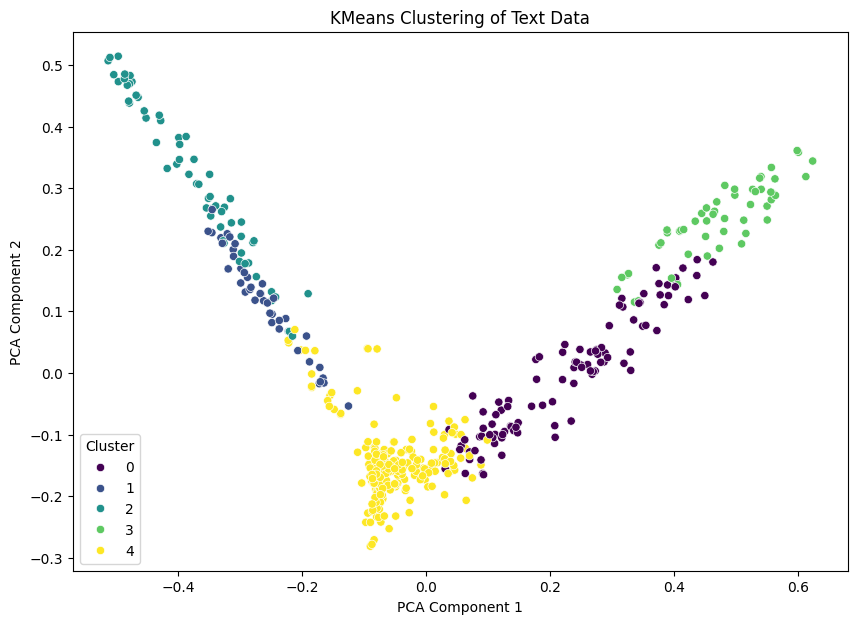

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Metin vektörlerini oluşturma
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(df['coontent_lemmatize'])
n_clusters=5
# K-Means modelini oluşturma
kmeans = KMeans(n_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# Küme etiketlerini alıp dataframe'e ekleyin
df['cluster_label'] = kmeans.labels_
# PCA ile boyut azaltma
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())
# DataFrame'e PCA sonuçlarını ekleme
df['pca1'] = reduced_X[:, 0]
df['pca2'] = reduced_X[:, 1]
# Her bir küme için atanan metinleri gösterme
for cluster_label in range(5):  # 5 küme için
    cluster_df = df[df['cluster_label'] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(cluster_df['content'].head(8))  # Her sınıfa ait ilk 5 metni göster


# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_label', data=df, palette='viridis')
plt.title('KMeans Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


C:\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['boyutta', 'com', 'dış', 'gör', 'haberler', 'lgi', 'merkezi', 'posta', 'servisi', 'tam'] not in stop_words.
  warnings.warn(



Cluster 0:
1     By euronews Yayınlanma Tarihi 03/11/2023 - 18:...
3      DUVAR - Türkiye Futbol Federasyonu, Galatasar...
5      Şarkıcı ve sosyal medya fenomeni Banu Parlak,...
6      DUVAR - Artan kira fiyatları, metropollerin y...
9     İstanbulda pazar günü düzenlenecek 45. İstanbu...
12     Sakaryanın Hendek ilçesindeki bir inşaatta er...
13    Danıştay tarafından yapılan yazılı açıklamada,...
14    By euronews Yayınlanma Tarihi 03/11/2023 - 10:...
Name: content, dtype: object

Cluster 1:
20      Diyarbakırda Bağlar Belediyesinde görevli F.K...
26     By euronews Yayınlanma Tarihi 02/11/2023 - 15:...
345    İstanbul İl Emniyet Müdürlüğü Göçmen Kaçakçılı...
351    "MİTin Cumhurbaşkanlığına sunduğu yargı raporu...
390    İstanbul Emniyet Müdürlüğü Mali Suçlarla Mücad...
396    İstanbul merkezli 6 ilde düzenlenen operasyond...
418    Haberin DevamıDilan ve Engin Polatın da arasın...
422    Haberin DevamıSuç işlemek maksadıyla örgüt kur...
Name: content, dtype: object

Cluster 2:
15

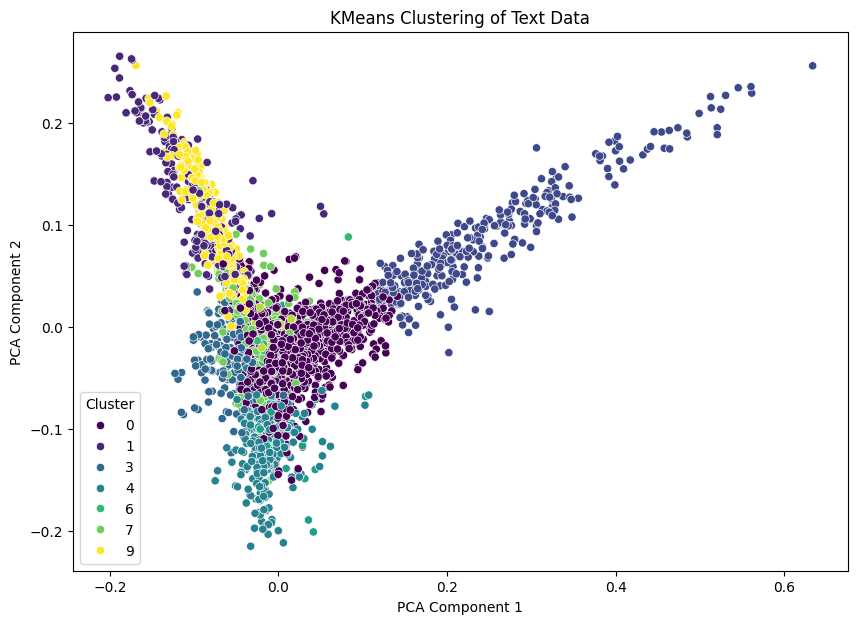

In [60]:

data=pd.read_csv('trainedilmis.csv')
data=data[data['source'] != 'indyturk'] 
data=data[0:5000]
# Metin vektörlerini oluşturma
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data['cleaned_text'])
n_clusters=10
# K-Means modelini oluşturma
kmeans = KMeans(n_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# Küme etiketlerini alıp dataframe'e ekleyin
data['cluster_label'] = kmeans.labels_
# PCA ile boyut azaltma
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())
# DataFrame'e PCA sonuçlarını ekleme
data['pca1'] = reduced_X[:, 0]
data['pca2'] = reduced_X[:, 1]
# Her bir küme için atanan metinleri gösterme
for cluster_label in range(10):  # 5 küme için
    cluster_df = data[data['cluster_label'] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(cluster_df['content'].head(8))  # Her sınıfa ait ilk 5 metni göster


# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_label', data=data, palette='viridis')
plt.title('KMeans Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [68]:
data=pd.read_csv('trainedilmis.csv')
data=data[data['source'] != 'indyturk'] 
data=data[0:5000]
# Metin vektörlerini oluşturma
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data['cleaned_text'])



# Küme etiketlerini alıp dataframe'e ekleyin
data['cluster_label'] = data['pseudo_label']
# PCA ile boyut azaltma
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())
# DataFrame'e PCA sonuçlarını ekleme
data['pca1'] = reduced_X[:, 0]
data['pca2'] = reduced_X[:, 1]
# Her bir küme için atanan metinleri gösterme
for cluster_label in range(10):  # 5 küme için
    cluster_df = data[data['cluster_label'] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(cluster_df['content'].head(8))  # Her sınıfa ait ilk 5 metni göster


# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_label', data=data, palette='viridis')
plt.title('KMeans Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

C:\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['boyutta', 'com', 'dış', 'gör', 'haberler', 'lgi', 'merkezi', 'posta', 'servisi', 'tam'] not in stop_words.
  warnings.warn(


MemoryError: Unable to allocate 4.77 GiB for an array with shape (5000, 127986) and data type float64

C:\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aras', 'açıklamak', 'binmekbaşkanı', 'deva', 'gerçek', 'lgi'] not in stop_words.
  warnings.warn(



Cluster 0:
2319    Vanın Başkale ilçesinde PKKlı teröristlerle gü...
2505    Milli Savunma Bakanlığından yapılan açıklamada...
2586    Milli Savunma Bakanlığından yapılan açıklamada...
2994    Son dakika haberine göre; Türk Silahlı Kuvvetl...
3005    Milli Savunma Bakanlığı, Irakın kuzeyindeki Ka...
3076    Irakın kuzeyinde bölücü terör örgütü tarafında...
3102    Şanlıurfanın Akçakale ilçesinin karşısında bul...
3106    IIrakın kuzeyinde devam eden Pençe Kilit Harek...
Name: content, dtype: object

Cluster 1:
20       Diyarbakırda Bağlar Belediyesinde görevli F.K...
390     İstanbul Emniyet Müdürlüğü Mali Suçlarla Mücad...
641     Dün sabah içerisinde 13 göçmenin bulunduğu bot...
691     Haberin DevamıKars Emniyet Müdürlüğü Narkotik ...
717     Haberin DevamıKaçakçılık Suçlarıyla Mücadele Ş...
881     Haberin DevamıOlay, Hassa ilçesi Akbez Mahalle...
979     Emniyet Genel Müdürlüğü Asayiş Daire Başkanlığ...
1037    İl Jandarma Komutanlığı ekipleri, Aydından fas...
Name: content, dtyp

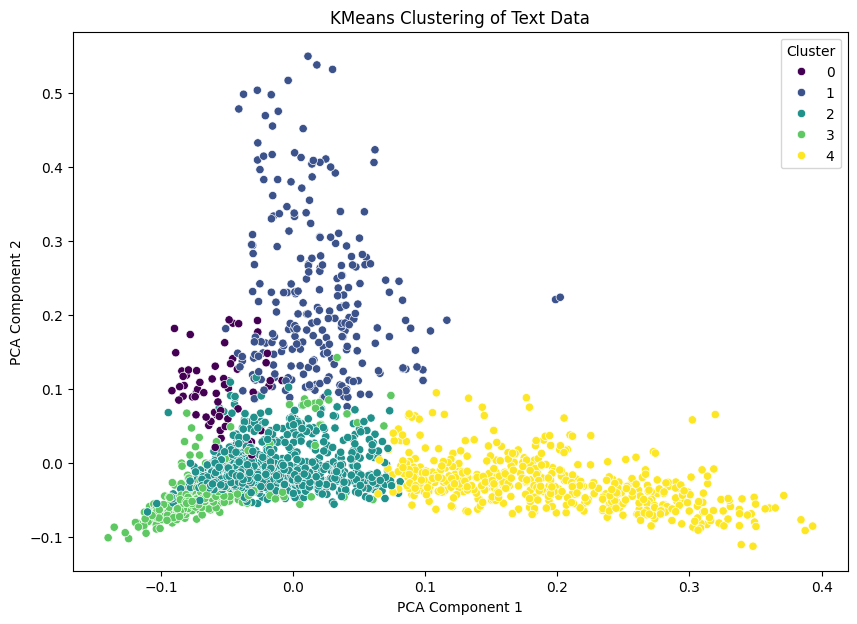

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('trainedilmis.csv')
data=data[data['source'] != 'indyturk'] 
data=data[data['pseudo_label']==-1]
# Metin vektörlerini oluşturma
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data['cleaned_text'])
n_clusters=5
# K-Means modelini oluşturma
kmeans = KMeans(n_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# Küme etiketlerini alıp dataframe'e ekleyin
data['cluster_label'] = kmeans.labels_
# PCA ile boyut azaltma
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())
# DataFrame'e PCA sonuçlarını ekleme
data['pca1'] = reduced_X[:, 0]
data['pca2'] = reduced_X[:, 1]
# Her bir küme için atanan metinleri gösterme
for cluster_label in range(5):  # 5 küme için
    cluster_df = data[data['cluster_label'] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(cluster_df['content'].head(8))  # Her sınıfa ait ilk 5 metni göster


# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_label', data=data, palette='viridis')
plt.title('KMeans Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [3]:
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("turkish")
stopwords1 = ['bir', 'nin', 'olan', 'göre',
              'bin', 'kadar', 'olduğu', 'nın',
              'tarafından', 'devam','yer', 
              'önce','olduğunu','ilk','aynı','yüzde',
              'olarak', 'fazla','son','milyon','var', 
              'yıl','yeni', 'ancak','açıklamada','geçen','genel','halt','hak'
              'iki','ilgili', 'deki','den','etti','oldu','diğer','yen', 'hal','altı','orta',
              'değil','kendi','sonra','gelen',',','iyi', 'birlikte','şekilde','ardından',
              'arasında','eden', 'yönelik', 'üzere', 'zaman','ilişkin', 'alt', 'Aras', 'Açıklamak','Binmek'
              'başkanı','gün','ekim','kasım','yüksek','milyar','büyük','yapılan','sahip','olmak',
              'üzerinde', 'sadece','karşı', 'içinde', 'farklı', 'tek','dan', 'kişi','caddesi','alan',
                'yılın', 'nun', 'oranı','hakkında','yılında','eylül', 'bunun','uzun','bugün', 'yemek','başka', 'genelmek', 'söz',
              'yüz', ' ', '“', '”', 'etmek', 'yılmak', 'yapmak' ,'ilmek', 'demek', 'almak', 'ara', 'bun', 'sağ','ala',
              'yermek' ,'Kadar','belirmek','şirket','gelmek','varmak','açıklama','vermek','çalışmak','konu','üzeri','ifade',
              'ben', 'durum', 'art', 'haber', 'azalmak', 'yan', 'açık', 'karmak', 'döne', 'par','söylemek','önem','yük','ilgi'
              ,'saat','kul','başlamak','kalmak','etki','kas','insan','ilişki','bölge','ilgi','yok','sıra','şekil','yok','ayn',
              'yol','baş','bulunmak','görmek', 'hafta','yaşamak','Deva','yapılanmak','hayat','ön','is','istemek','İlgi', 'iç', 'imek','binmek','Gerçek','iki','faz'
             ]
stopwords = stopwords+stopwords1
#df['content-token'] = df['content-token'].apply(lambda x: [item for item in x if item not in stopwords])
#df['content-token']